In [1]:
df<-read.csv('d:/data/voice/voice2.csv')
head(df)

meanfreq,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Label,target
0.05978099,12.863462,274.402905,0.8933694,0.4919178,0.00000000,0.05978099,0.08427911,0.01570167,0.2758621,0.007812500,0.0078125,0.0078125,0.0000000,0.00000000,male,1
0.06600874,22.423285,634.613855,0.8921932,0.5137238,0.00000000,0.06600874,0.10793655,0.01582591,0.2500000,0.009014423,0.0078125,0.0546875,0.0468750,0.05263158,male,1
0.07731550,30.757155,1024.927705,0.8463891,0.4789050,0.00000000,0.07731550,0.09870626,0.01565558,0.2711864,0.007990057,0.0078125,0.0156250,0.0078125,0.04651163,male,1
0.15122809,1.232831,4.177296,0.9633225,0.7272318,0.08387818,0.15122809,0.08896485,0.01779755,0.2500000,0.201497396,0.0078125,0.5625000,0.5546875,0.24711908,male,1
0.13512039,1.101174,4.333713,0.9719551,0.7835681,0.10426140,0.13512039,0.10639785,0.01693122,0.2666667,0.712812500,0.0078125,5.4843750,5.4765625,0.20827389,male,1
0.13278641,1.932562,8.308895,0.9631813,0.7383070,0.11255543,0.13278641,0.11013192,0.01711230,0.2539683,0.298221983,0.0078125,2.7265625,2.7187500,0.12515964,male,1


In [2]:
library(dplyr)
df<-df %>% select(-Label)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 3168   16

meanfreq,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,target
0.05978099,12.863462,274.402905,0.8933694,0.4919178,0.00000000,0.05978099,0.08427911,0.01570167,0.2758621,0.007812500,0.0078125,0.0078125,0.0000000,0.00000000,1
0.06600874,22.423285,634.613855,0.8921932,0.5137238,0.00000000,0.06600874,0.10793655,0.01582591,0.2500000,0.009014423,0.0078125,0.0546875,0.0468750,0.05263158,1
0.07731550,30.757155,1024.927705,0.8463891,0.4789050,0.00000000,0.07731550,0.09870626,0.01565558,0.2711864,0.007990057,0.0078125,0.0156250,0.0078125,0.04651163,1
0.15122809,1.232831,4.177296,0.9633225,0.7272318,0.08387818,0.15122809,0.08896485,0.01779755,0.2500000,0.201497396,0.0078125,0.5625000,0.5546875,0.24711908,1
0.13512039,1.101174,4.333713,0.9719551,0.7835681,0.10426140,0.13512039,0.10639785,0.01693122,0.2666667,0.712812500,0.0078125,5.4843750,5.4765625,0.20827389,1
0.13278641,1.932562,8.308895,0.9631813,0.7383070,0.11255543,0.13278641,0.11013192,0.01711230,0.2539683,0.298221983,0.0078125,2.7265625,2.7187500,0.12515964,1



   0    1 
1584 1584 

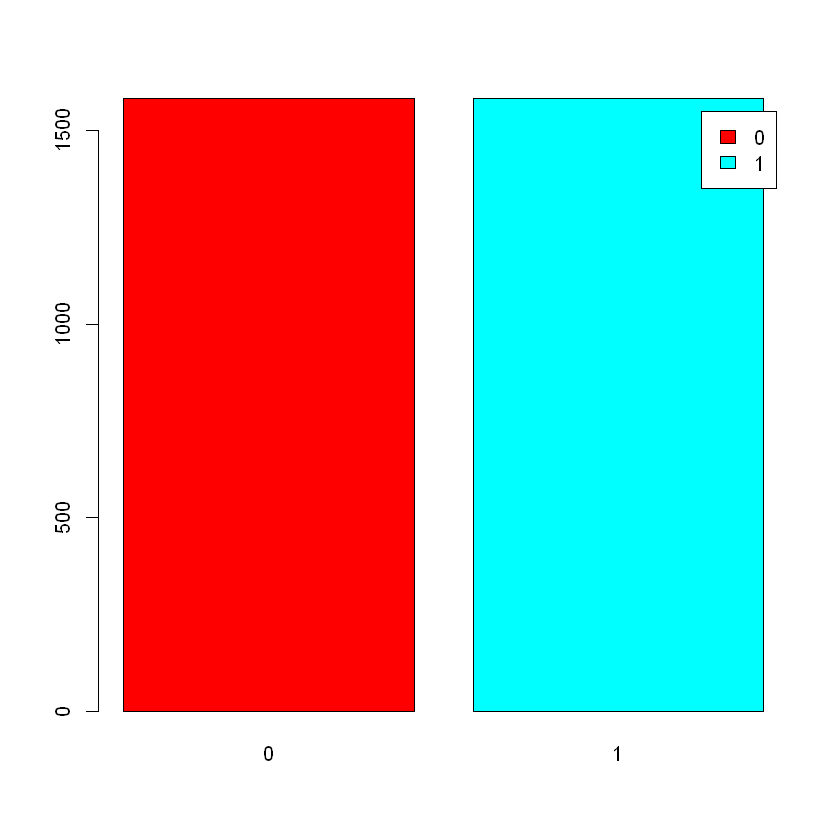

In [3]:
(tbl<-table(df$target))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [9]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df$target, p=0.8,list=F)
train<-df[idx_train,]
X_train<-train[,-16]
y_train<-train[,16]
test<-df[-idx_train,]
X_test<-test[,-16]
y_test<-test[,16]

ERROR: Error in createDataPartition(y = df$target, p = 0.8, list = F): y must have at least 2 data points


k,accuracy
1,0.9699367


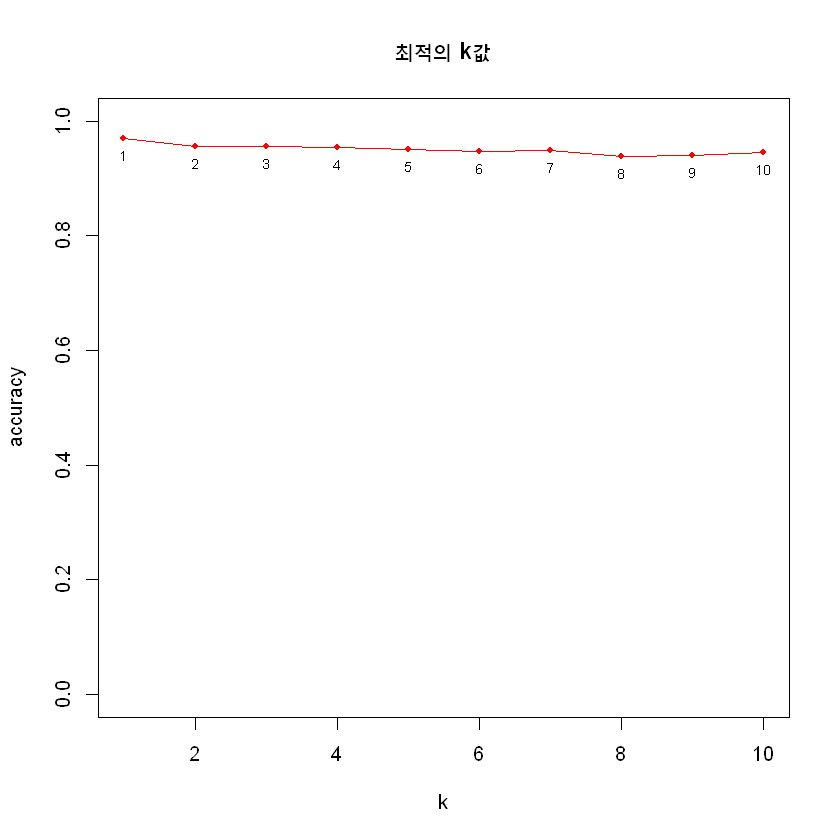

In [10]:
library(class)
acc<-NULL
for ( i in c(1:10)){
    set.seed(123)
    pred=knn(train=train,test=test,cl=y_train,k=i)
    acc<-c(acc,mean(y_test == pred))
}
df<-data.frame(k=c(1:10), accuracy=acc)
plot(accuracy ~ k , data=df, type='o',pch=20, main='최적의 k값',
    ylim=c(0,1),col='red')
with(df,text(accuracy ~ k, labels=c(1:10),pos=1,cex=0.7))
n<-min(df[df$accuracy %in% max(acc),'k'])
df[n,]

In [11]:
library(class)
set.seed(123)
pred<-knn(train=train, test=test, cl=y_train, k=n)
table(y_test,pred)
mean(y_test==pred)

      pred
y_test   0   1
     0 308   8
     1  11 305

[1] 0.9699367